In [4]:
import pandas as pd
import numpy as np

from sklearn.metrics import mean_squared_error as mse
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.linear_model import LinearRegression, Ridge


import matplotlib.pyplot as plt

%matplotlib inline

In [68]:
pd.options.display.max_columns = 500
pd.options.display.max_rows = 500

In [5]:
transactions = pd.read_csv('transactions.csv')
customers_gender_train = pd.read_csv('customers_gender_train.csv')

In [53]:
transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN
1,39026145,1 10:19:29,6011,7010,56147.89,NaN
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN
4,39026145,2 15:33:42,5499,1010,-920.83,NaN


In [6]:
all_set = pd.merge(transactions, customers_gender_train, how="left")

In [7]:
train = all_set[pd.notnull(all_set.gender)]

In [60]:
costs = transactions[transactions.amount < 0]
costs.amount = -1*costs.amount
costs_mcc = costs.groupby(('customer_id', "mcc_code")).mean().amount.unstack().fillna(0)

/Users/d.parpulov/anaconda/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [62]:
costs_mcc.columns = map(lambda x: "mcc_code_"+str(x), costs_mcc.columns)
costs_mcc.head()

,mcc_code_742,mcc_code_1711,mcc_code_1731,mcc_code_1799,mcc_code_2741,mcc_code_3000,mcc_code_3351,mcc_code_3501,mcc_code_4111,mcc_code_4112,mcc_code_4121,mcc_code_4131,mcc_code_4214,mcc_code_4215,mcc_code_4411,mcc_code_4511,mcc_code_4722,mcc_code_4784,mcc_code_4789,mcc_code_4812,mcc_code_4814,mcc_code_4816,mcc_code_4829,mcc_code_4899,mcc_code_4900,mcc_code_5013,mcc_code_5039,mcc_code_5044,mcc_code_5045,mcc_code_5047,mcc_code_5065,mcc_code_5072,mcc_code_5074,mcc_code_5085,mcc_code_5094,mcc_code_5099,mcc_code_5111,mcc_code_5122,mcc_code_5131,mcc_code_5137,mcc_code_5169,mcc_code_5172,mcc_code_5192,mcc_code_5193,mcc_code_5199,mcc_code_5200,mcc_code_5211,mcc_code_5231,mcc_code_5251,mcc_code_5261,mcc_code_5300,mcc_code_5309,mcc_code_5310,mcc_code_5311,mcc_code_5331,mcc_code_5399,mcc_code_5411,mcc_code_5422,mcc_code_5441,mcc_code_5451,mcc_code_5462,mcc_code_5499,mcc_code_5511,mcc_code_5532,mcc_code_5533,mcc_code_5541,mcc_code_5542,mcc_code_5571,mcc_code_5599,mcc_code_5611,mcc_code_5621,mcc_code_5631,mcc_code_5641,mcc_code_5651,mcc_code_5655,mcc_code_5661,mcc_code_5681,mcc_code_5691,mcc_code_5697,mcc_code_5699,mcc_code_5712,mcc_code_5713,mcc_code_5714,mcc_code_5719,mcc_code_5722,mcc_code_5732,mcc_code_5733,mcc_code_5734,mcc_code_5735,mcc_code_5811,mcc_code_5812,mcc_code_5813,mcc_code_5814,mcc_code_5816,mcc_code_5912,mcc_code_5921,mcc_code_5931,mcc_code_5940,mcc_code_5941,mcc_code_5942,mcc_code_5943,mcc_code_5944,mcc_code_5945,mcc_code_5946,mcc_code_5947,mcc_code_5948,mcc_code_5949,mcc_code_5950,mcc_code_5964,mcc_code_5965,mcc_code_5967,mcc_code_5968,mcc_code_5969,mcc_code_5970,mcc_code_5971,mcc_code_5976,mcc_code_5977,mcc_code_5983,mcc_code_5992,mcc_code_5993,mcc_code_5994,mcc_code_5995,mcc_code_5999,mcc_code_6010,mcc_code_6011,mcc_code_6012,mcc_code_6051,mcc_code_6211,mcc_code_6300,mcc_code_6513,mcc_code_6536,mcc_code_7011,mcc_code_7210,mcc_code_7216,mcc_code_7221,mcc_code_7230,mcc_code_7273,mcc_code_7278,mcc_code_7298,mcc_code_7299,mcc_code_7311,mcc_code_7338,mcc_code_7372,mcc_code_7375,mcc_code_7395,mcc_code_7399,mcc_code_7512,mcc_code_7523,mcc_code_7531,mcc_code_7538,mcc_code_7542,mcc_code_7629,mcc_code_7699,mcc_code_7829,mcc_code_7832,mcc_code_7841,mcc_code_7922,mcc_code_7932,mcc_code_7933,mcc_code_7991,mcc_code_7993,mcc_code_7994,mcc_code_7995,mcc_code_7996,mcc_code_7997,mcc_code_7999,mcc_code_8011,mcc_code_8021,mcc_code_8043,mcc_code_8062,mcc_code_8071,mcc_code_8099,mcc_code_8220,mcc_code_8244,mcc_code_8299,mcc_code_8398,mcc_code_8641,mcc_code_8699,mcc_code_8999,mcc_code_9211,mcc_code_9222,mcc_code_9311,mcc_code_9399,mcc_code_9402
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6815,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.00,2770.465889,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,8070.017241,0.000000,0.00,8139.523793,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.0000,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.000000,0.0,0.00,12464.835,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.000000,0.000,45880.852571,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0
22899,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.00,3737.740213,0.0,1.160922e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,5934.835000,4626.59,14989.466667,0.0,0.0,0.0,0.0,10567.633333,0.0,0.0,0.0,6850.690,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.00,0.0,

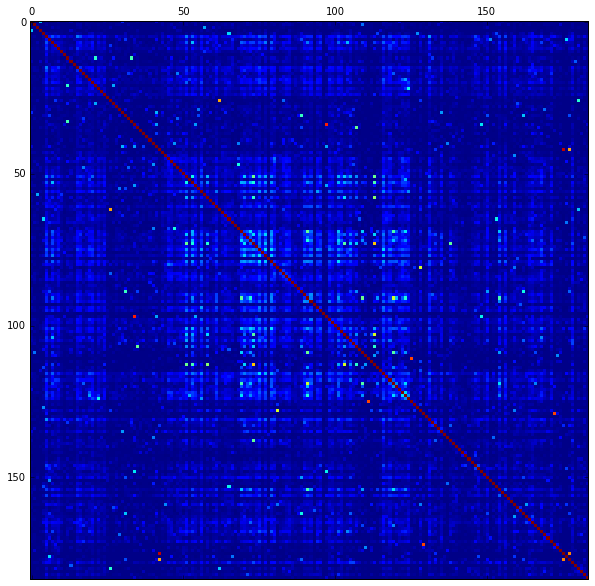

In [91]:
plt.figure(figsize=(10,10))
plt.matshow(costs_mcc.corr(),  fignum=1, )

In [71]:
corr_mcc = costs_mcc.corr()
corr_mcc.head(100)

,mcc_code_742,mcc_code_1711,mcc_code_1731,mcc_code_1799,mcc_code_2741,mcc_code_3000,mcc_code_3351,mcc_code_3501,mcc_code_4111,mcc_code_4112,mcc_code_4121,mcc_code_4131,mcc_code_4214,mcc_code_4215,mcc_code_4411,mcc_code_4511,mcc_code_4722,mcc_code_4784,mcc_code_4789,mcc_code_4812,mcc_code_4814,mcc_code_4816,mcc_code_4829,mcc_code_4899,mcc_code_4900,mcc_code_5013,mcc_code_5039,mcc_code_5044,mcc_code_5045,mcc_code_5047,mcc_code_5065,mcc_code_5072,mcc_code_5074,mcc_code_5085,mcc_code_5094,mcc_code_5099,mcc_code_5111,mcc_code_5122,mcc_code_5131,mcc_code_5137,mcc_code_5169,mcc_code_5172,mcc_code_5192,mcc_code_5193,mcc_code_5199,mcc_code_5200,mcc_code_5211,mcc_code_5231,mcc_code_5251,mcc_code_5261,mcc_code_5300,mcc_code_5309,mcc_code_5310,mcc_code_5311,mcc_code_5331,mcc_code_5399,mcc_code_5411,mcc_code_5422,mcc_code_5441,mcc_code_5451,mcc_code_5462,mcc_code_5499,mcc_code_5511,mcc_code_5532,mcc_code_5533,mcc_code_5541,mcc_code_5542,mcc_code_5571,mcc_code_5599,mcc_code_5611,mcc_code_5621,mcc_code_5631,mcc_code_5641,mcc_code_5651,mcc_code_5655,mcc_code_5661,mcc_code_5681,mcc_code_5691,mcc_code_5697,mcc_code_5699,mcc_code_5712,mcc_code_5713,mcc_code_5714,mcc_code_5719,mcc_code_5722,mcc_code_5732,mcc_code_5733,mcc_code_5734,mcc_code_5735,mcc_code_5811,mcc_code_5812,mcc_code_5813,mcc_code_5814,mcc_code_5816,mcc_code_5912,mcc_code_5921,mcc_code_5931,mcc_code_5940,mcc_code_5941,mcc_code_5942,mcc_code_5943,mcc_code_5944,mcc_code_5945,mcc_code_5946,mcc_code_5947,mcc_code_5948,mcc_code_5949,mcc_code_5950,mcc_code_5964,mcc_code_5965,mcc_code_5967,mcc_code_5968,mcc_code_5969,mcc_code_5970,mcc_code_5971,mcc_code_5976,mcc_code_5977,mcc_code_5983,mcc_code_5992,mcc_code_5993,mcc_code_5994,mcc_code_5995,mcc_code_5999,mcc_code_6010,mcc_code_6011,mcc_code_6012,mcc_code_6051,mcc_code_6211,mcc_code_6300,mcc_code_6513,mcc_code_6536,mcc_code_7011,mcc_code_7210,mcc_code_7216,mcc_code_7221,mcc_code_7230,mcc_code_7273,mcc_code_7278,mcc_code_7298,mcc_code_7299,mcc_code_7311,mcc_code_7338,mcc_code_7372,mcc_code_7375,mcc_code_7395,mcc_code_7399,mcc_code_7512,mcc_code_7523,mcc_code_7531,mcc_code_7538,mcc_code_7542,mcc_code_7629,mcc_code_7699,mcc_code_7829,mcc_code_7832,mcc_code_7841,mcc_code_7922,mcc_code_7932,mcc_code_7933,mcc_code_7991,mcc_code_7993,mcc_code_7994,mcc_code_7995,mcc_code_7996,mcc_code_7997,mcc_code_7999,mcc_code_8011,mcc_code_8021,mcc_code_8043,mcc_code_8062,mcc_code_8071,mcc_code_8099,mcc_code_8220,mcc_code_8244,mcc_code_8299,mcc_code_8398,mcc_code_8641,mcc_code_8699,mcc_code_8999,mcc_code_9211,mcc_code_9222,mcc_code_9311,mcc_code_9399,mcc_code_9402
mcc_code_742,1.000000,0.000425,-0.000909,0.316040,-0.001630,0.004116,0.000099,-0.002348,-0.000641,0.015914,0.001477,0.000172,0.003452,0.031714,-0.001484,0.013579,0.008541,-0.001092,0.008014,0.004937,0.006838,-0.000964,-0.001318,0.001296,0.015047,-0.000855,0.003362,0.000736,0.001084,0.002935,0.148401,0.000492,-0.001791,-0.001573,-0.001365,0.007216,0.001950,-0.000032,-0.002295,-0.002879,0.000043,0.058707,0.005467,0.019257,-0.002278,0.000875,-0.000416,-0.002524,0.001227,0.031532,0.004480,0.010630,0.001459,0.016180,0.018776,-0.000384,0.037534,-0.002655,0.017406,0.016502,0.003694,0.021571,-0.000162,-0.000872,0.009317,0.009991,-0.002952,0.003992,0.007990,0.003077,0.013463,0.036579,0.016588,0.007748,0.019951,0.031562,-0.005441,0.024766,-0.001083,0.023638,0.005364,0.010267,0.009798,0.005526,0.036175,0.014228,-0.002154,0.000161,0.024754,0.018987,0.012098,0.010157,0.026458,0.004266,0.030320,0.016941,-0.001256,0.006403,0.020172,0.007394,0.002789,0.047118,0.005499,1.257985e-02,0.024403,0.031766,0.015776,-0.000602,0.011011,-0.001425,-1.352324e-03,-0.000446,-0.001326,-0.000362,-0.001511,0.001198,0.030216,0.022842,0.006299,0.000891,0.012221,0.075096,0.007764,-0.000115,0.006820,0.000903,-0.001428,-0.001475,0.001930,0.007589,-0.002457,0.015226,-0.003087,-0.003355,-0.002077,0.065946,0.014410,-0.001505,0.022447,0.003769,1.338804e-03,0.000281,0.003597,-0.002030,-0.001377,0.006625,0.004111,0.001613,-0.001412,0.016107,0.01

In [86]:
(corr_mcc.loc["mcc_code_9222",:])

mcc_code_742    -0.000461
mcc_code_1711    0.001804
mcc_code_1731    0.009924
mcc_code_1799   -0.001055
mcc_code_2741    0.000606
mcc_code_3000    0.050918
mcc_code_3351   -0.000166
mcc_code_3501    0.015059
mcc_code_4111    0.097553
mcc_code_4112    0.025624
mcc_code_4121    0.026530
mcc_code_4131   -0.001345
mcc_code_4214    0.014027
mcc_code_4215    0.015188
mcc_code_4411    0.020319
mcc_code_4511    0.042834
mcc_code_4722    0.026390
mcc_code_4784    0.011717
mcc_code_4789    0.007841
mcc_code_4812    0.036118
mcc_code_4814    0.033147
mcc_code_4816    0.013638
mcc_code_4829    0.026100
mcc_code_4899    0.016346
mcc_code_4900    0.049269
mcc_code_5013    0.000213
mcc_code_5039    0.390577
mcc_code_5044   -0.000807
mcc_code_5045    0.000933
mcc_code_5047   -0.002345
mcc_code_5065   -0.000673
mcc_code_5072    0.009633
mcc_code_5074    0.025422
mcc_code_5085   -0.000761
mcc_code_5094   -0.001060
mcc_code_5099    0.002114
mcc_code_5111    0.002797
mcc_code_5122   -0.001653
mcc_code_513

In [ ]:
3000(Авиалинии, авиакомпании) - 5309(Беспошлинные магазины Duty Free), 7011(Отели, мотели, базы отдыха, сервисы бронирования)
9222(Штрафы)  - 5511(Легковой и грузовой транспорт — продажа, сервис, ремонт, запчасти и лизинг)
5311(Универмаги) - 5641(Детская одежда),5651(Одежда для всей семьи), 5970(Магазины художественных и ремесленных изделий)

In [87]:
costs = transactions[transactions.amount < 0]
costs.amount = -1*costs.amount
costs_trtype = costs.groupby(('customer_id', "tr_type")).mean().amount.unstack().fillna(0)

In [88]:
costs_trtype.columns = map(lambda x: "trtype"+str(x), costs_trtype.columns)
costs_trtype.head()

,trtype1000,trtype1010,trtype1030,trtype1100,trtype1110,trtype1200,trtype1210,trtype1310,trtype1410,trtype1510,trtype2000,trtype2010,trtype2011,trtype2020,trtype2021,trtype2100,trtype2110,trtype2200,trtype2210,trtype2320,trtype2330,trtype2331,trtype2340,trtype2341,trtype2370,trtype2371,trtype2440,trtype2446,trtype2456,trtype2460,trtype4010,trtype4011,trtype4020,trtype4021,trtype4031,trtype4035,trtype4041,trtype4045,trtype4051,trtype4061,trtype4071,trtype4090,trtype4096,trtype4097,trtype4100,trtype4110,trtype4200,trtype4210,trtype4500,trtype6110,trtype7010,trtype7020,trtype7021,trtype7030,trtype7031,trtype7070,trtype7071
customer_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
6815,0.0,7627.253810,2770.465889,0.000000e+00,9703.427778,0.00,0.0,0.0,0.0,0.0,0.0,45880.852571,0.000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000000e+00,0.00,0.00,0.0,0.000000e+00,0.000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.00,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22899,0.0,6237.096667,3737.740213,0.000000e+00,10555.671852,763.61,0.0,0.0,0.0,0.0,0.0,56802.954167,0.000,0.00,0.0,0.0,6737.75,0.0,0.0,0.0,2.414359e+05,233575.24,0.00,0.0,5.136838e+04,319751.028,0.0,0.0,0.0,0.0,9166.1425,0.0,0.0,0.0,0.00,0.0,0.000,0.0,2335.75,0.0,3197.51,0.0,0.0,0.0,0.0,8759.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27914,0.0,0.000000,2896.459828,0.000000e+00,6731.460000,22158.09,0.0,0.0,0.0,0.0,0.0,254911.441667,0.000,0.00,0.0,0.0,0.00,0.0,0.0,0.0,3.630897e+04,0.00,0.00,0.0,0.000000e+00,0.000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.00,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
28753,0.0,129090.968764,6647.909200,1.937125e+06,66132.496154,0.00,0.0,0.0,0.0,0.0,0.0,418676.132083,162828.895,1052885.31,0.0,0.0,0.00,0.0,0.0,0.0,1.088363e+06,0.00,3099363.77,0.0,1.358030e+06,0.000,0.0,0.0,0.0,0.0,0.0000,0.0,0.0,0.0,0.00,0.0,0.000,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
31385,0.0,6110.220533,2921.307760,0.000000e+00,11946.789467,0.00,0.0,0.0,0.0,0.0,0.0,23715.348814,20213.240,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.000000e+00,288600.18,0.00,0.0,0.000000e+00,0.000,0.0,0.0,0.0,0.0,0.0000,151.6,0.0,0.0,210.55,0.0,210.555,0.0,2886.00,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


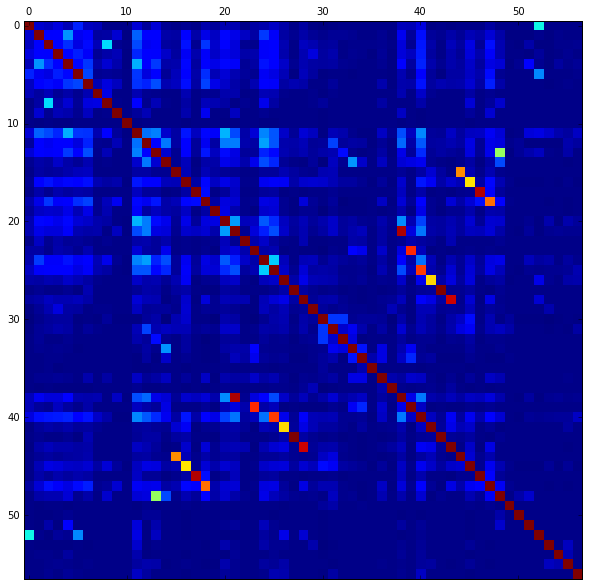

In [89]:
plt.figure(figsize=(10,10))
plt.matshow(costs_trtype.corr(),  fignum=1, )

In [90]:
corr_trtype = costs_trtype.corr()
corr_trtype.head(100)

,trtype1000,trtype1010,trtype1030,trtype1100,trtype1110,trtype1200,trtype1210,trtype1310,trtype1410,trtype1510,trtype2000,trtype2010,trtype2011,trtype2020,trtype2021,trtype2100,trtype2110,trtype2200,trtype2210,trtype2320,trtype2330,trtype2331,trtype2340,trtype2341,trtype2370,trtype2371,trtype2440,trtype2446,trtype2456,trtype2460,trtype4010,trtype4011,trtype4020,trtype4021,trtype4031,trtype4035,trtype4041,trtype4045,trtype4051,trtype4061,trtype4071,trtype4090,trtype4096,trtype4097,trtype4100,trtype4110,trtype4200,trtype4210,trtype4500,trtype6110,trtype7010,trtype7020,trtype7021,trtype7030,trtype7031,trtype7070,trtype7071
trtype1000,1.000000,0.058430,0.046690,0.074653,0.039451,0.150890,0.046064,0.040386,-0.000092,-0.000232,-0.000209,0.068413,0.015650,0.065265,0.007261,-0.000908,0.008587,-0.000604,0.031793,0.016323,0.036663,0.036479,-0.000745,0.023586,0.032377,0.050304,0.027728,-0.001063,0.020633,-0.002229,-0.007087,-0.003616,-0.001574,0.000305,-0.001204,-0.000241,-0.001319,-0.000429,0.042082,0.038711,0.075595,-0.002444,-0.001111,-0.002303,-0.001387,0.001887,-0.000712,0.019016,-0.001726,-0.000403,-0.000316,-0.000225,0.363536,-0.000429,-0.000209,-0.000646,-0.000260
trtype1010,0.058430,1.000000,0.104180,0.111409,0.264128,0.090186,0.114781,0.021429,0.024236,0.062798,-0.001928,0.214509,0.110199,0.115876,0.028840,0.022842,0.112794,0.026150,0.082209,0.050779,0.123310,0.083361,0.052723,0.021983,0.175463,0.097851,0.024003,0.008681,0.029478,0.011188,0.004507,0.011660,0.013015,0.007313,0.001703,-0.001463,0.009662,-0.002832,0.090033,0.016583,0.129073,0.014435,0.008388,0.026328,0.011568,0.040853,0.026077,0.066818,0.028495,-0.001883,-0.002286,-0.002736,0.004245,-0.003561,0.005309,-0.000335,-0.000301
trtype1030,0.046690,0.104180,1.000000,0.102597,0.162719,0.079741,0.125428,0.040424,0.334795,0.006179,-0.000875,0.188301,0.091788,0.099171,0.021122,0.013979,0.132720,0.009904,0.171149,0.058753,0.109498,0.070520,0.007107,0.004631,0.097291,0.102359,0.036781,-0.000994,0.048474,0.035639,0.014293,0.019973,0.001887,0.004346,0.002995,0.003154,0.008437,-0.001834,0.070224,0.006158,0.138103,0.029398,-0.001130,0.044430,0.017920,0.079766,0.011267,0.129668,0.033763,-0.001448,-0.002873,0.026319,-0.004020,-0.002429,0.003057,0.005836,0.008939
trtype1100,0.074653,0.111409,0.102597,1.000000,0.111828,0.146520,0.098095,0.013444,0.029436,0.040958,-0.002358,0.153867,0.114616,0.103624,0.056556,0.018939,0.093763,0.029922,0.097360,0.056596,0.088871,0.070415,0.026479,0.033173,0.099789,0.110994,0.030386,0.000275,0.037189,0.073280,0.018539,0.031616,0.002050,0.008231,0.003712,-0.002719,0.013368,-0.003300,0.072316,0.048628,0.140389,0.020818,-0.000043,0.032300,0.013583,0.070409,0.033210,0.100283,0.033944,-0.000764,-0.000388,-0.002459,0.014885,-0.002029,-0.000105,0.007888,0.000123
trtype1110,0.039451,0.264128,0.162719,0.111828,1.000000,0.123441,0.168215,0.028430,0.061488,0.031935,-0.002874,0.290201,0.112837,0.174664,0.026907,0.033052,0.122972,0.019345,0.103620,0.082584,0.121751,0.099912,0.011841,0.024352,0.133654,0.112517,0.056567,0.009732,0.035048,0.023659,0.018890,0.024986,0.006740,0.005213,0.000026,-0.001036,0.008604,-0.005141,0.109530,0.020317,0.148627,0.031412,0.009180,0.030362,0.018909,0.056277,0.018024,0.079939,0.068360,-0.002143,0.009770,0.103366,0.009765,-0.003352,0.021756,0.002229,0.010565
trtype1200,0.150890,0.090186,0.079741,0.146520,0.123441,1.000000,0.186982,0.006512,0.010231,0.008140,-0.001180,0.169782,0.076553,0.108709,0.013611,0.045335,0.108265,0.026627,0.160971,0.039256,0.065854,0.035593,0.014533,0.007439,0.095768,0.080295,0.039532,-0.004936,0.043533,0.021056,-0.002266,0.000906,-0.001067,-0.003139,-0.001110,0.000723,-0.001130,-0.001929,0.036239,0.004696,0.109578,0.017862,-0.005140,0.024189,0.024322,0.052694,0.030428,0.125338,0.007156,-0.000851,-0.001497,0.002043,0.251537,-0.001028,-0.001180,-0.001688,0.003390
trtype1210,0.046064,0.114781,0.125428,0.098095,0.168215,0.186982,1.000000,0.036564,0.073306,0.047764,-0.000972,0.167727,0.149682,0.192039,0.037483,0.048632

In [ ]:
trtype2341 (Списание с карты по операции “перевода с карты на карту” через POS (из одного ТБ в другой ТБ)) - trtype4061 (Плата за перевод на карту (с карты) через POS (из одного ТБ в другой ТБ))
trtype2331 (Списание с карты по операции “перевода с карты на карту” через АТМ (из одного ТБ в другой ТБ) - trtype4051(Плата за перевод на карту (с карты) через АТМ (из одного ТБ в другой ТБ))
trtype2371 (Списание с карты на карту по операции <перевода с карты на карту> через Мобильный банк (с комиссией)) - trtype4071 (Плата за перевод на карту (с карты) через Мобильный банк)            

In [104]:
transactions["day"] = transactions.tr_datetime.apply(lambda x: int(x.split(" ")[0]))

In [113]:
transactions.head()

,customer_id,tr_datetime,mcc_code,tr_type,amount,term_id,day
0,39026145,0 10:23:26,4814,1030,-2245.92,NaN,0
1,39026145,1 10:19:29,6011,7010,56147.89,NaN,1
2,39026145,1 10:20:56,4829,2330,-56147.89,NaN,1
3,39026145,1 10:39:54,5499,1010,-1392.47,NaN,1
4,39026145,2 15:33:42,5499,1010,-920.83,NaN,2


In [241]:
aggr_by_day = transactions[transactions.amount > 0 ].groupby('day').sum().amount
aggr_by_day = - aggr_by_day

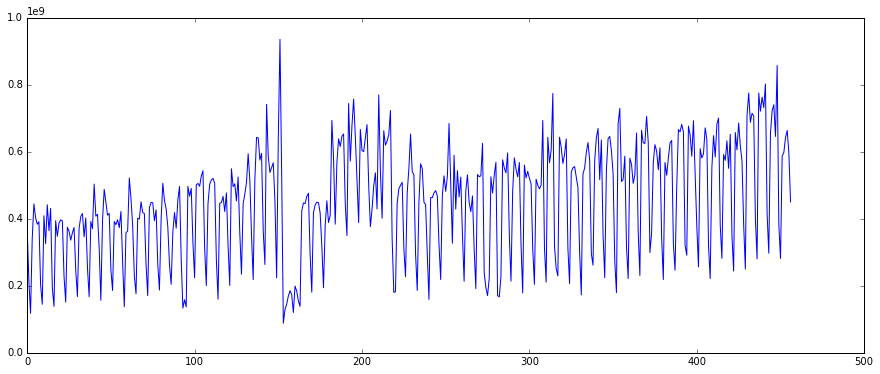

In [242]:
plt.figure(figsize=(15,6))
plt.plot(aggr_by_day)
plt.show()

In [225]:
# 153 day - 1st january 2015

start_date = pd.to_datetime("2015-01-01") + pd.DateOffset(days=-153)
end_date = start_date + pd.DateOffset(days=aggr_by_day.shape[0]-1)

In [226]:
aggr_by_day = aggr_by_day.reset_index()
aggr_by_day.head()

,day,amount
0,0,6.861654e+08
1,1,4.312505e+08
2,2,3.510783e+08
3,3,6.345417e+08
4,4,6.841690e+08


In [227]:
aggr_by_day["date"] = pd.date_range(start_date, end_date)

In [228]:
aggr_by_day.loc[150:160,:] # all is ok

,day,amount,date
150,150,1.016915e+09,2014-12-29
151,151,1.508279e+09,2014-12-30
152,152,9.703842e+08,2014-12-31
153,153,1.799873e+08,2015-01-01
154,154,2.687206e+08,2015-01-02
155,155,3.821639e+08,2015-01-03
156,156,3.649086e+08,2015-01-04
157,157,4.017619e+08,2015-01-05
158,158,3.868203e+08,2015-01-06
159,159,2.758369e+08,2015-01-07


In [229]:
aggr_by_day = aggr_by_day.set_index("date")

In [230]:
aggr_by_day.head()

,day,amount
date,,
2014-08-01,0,6.861654e+08
2014-08-02,1,4.312505e+08
2014-08-03,2,3.510783e+08
2014-08-04,3,6.345417e+08
2014-08-05,4,6.841690e+08


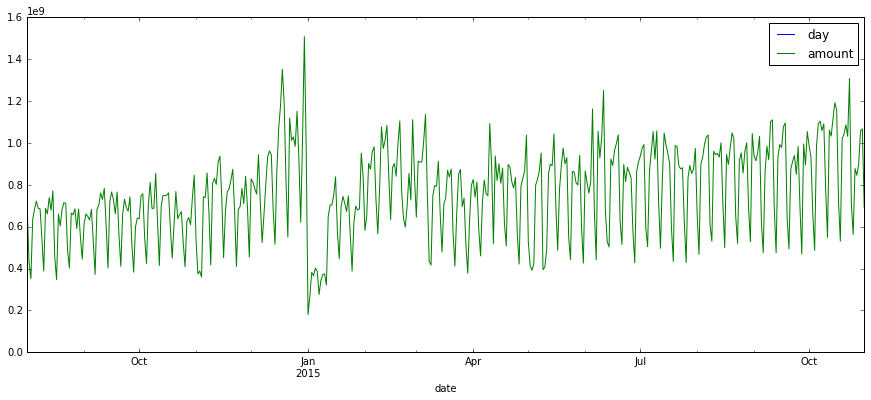

In [231]:
aggr_by_day.plot(figsize=(15,6))

In [232]:
aggr_by_day["weekday"] = aggr_by_day.index.weekday_name

In [233]:
aggr_by_day.head()  #Monday=0, Sunday=6.
## weekend - 5,6

,day,amount,weekday
date,,,
2014-08-01,0,6.861654e+08,Friday
2014-08-02,1,4.312505e+08,Saturday
2014-08-03,2,3.510783e+08,Sunday
2014-08-04,3,6.345417e+08,Monday
2014-08-05,4,6.841690e+08,Tuesday


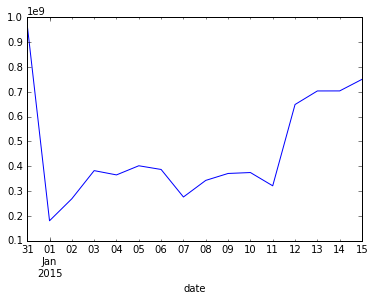

In [234]:
aggr_by_day.loc["2014-12-31":"2015-01-15",:].amount.plot()

In [235]:
holidays = map(lambda x: pd.to_datetime(x), ["2014-11-03", "2014-11-04" , "2015-01-01", "2015-01-02", "2015-01-03", "2015-01-04", "2015-01-05", 
            "2015-01-06", "2015-01-07", "2015-01-08", "2015-01-09", "2015-01-10", "2015-01-11", "2015-02-23",
            "2015-03-09", "2015-05-01", "2015-05-04", "2015-05-11", "2015-06-12", "2015-11-04"])

aggr_by_day["weekend"] = aggr_by_day.weekday.apply(lambda x: int(x in ["Saturday", "Sunday"])) | aggr_by_day.index.map(lambda x: int(x in holidays)) 

In [236]:
aggr_by_day.loc["2014-12-31":"2015-01-15",:]

,day,amount,weekday,weekend
date,,,,
2014-12-31,152,9.703842e+08,Wednesday,0
2015-01-01,153,1.799873e+08,Thursday,1
2015-01-02,154,2.687206e+08,Friday,1
2015-01-03,155,3.821639e+08,Saturday,1
2015-01-04,156,3.649086e+08,Sunday,1
2015-01-05,157,4.017619e+08,Monday,1
2015-01-06,158,3.868203e+08,Tuesday,1
2015-01-07,159,2.758369e+08,Wednesday,1
2015-01-08,160,3.427920e+08,Thursday,1


In [237]:
aggr_true_date = aggr_by_day.reset_index()

In [238]:
aggr_true_date.head()

,date,day,amount,weekday,weekend
0,2014-08-01,0,6.861654e+08,Friday,0
1,2014-08-02,1,4.312505e+08,Saturday,1
2,2014-08-03,2,3.510783e+08,Sunday,1
3,2014-08-04,3,6.345417e+08,Monday,0
4,2014-08-05,4,6.841690e+08,Tuesday,0
